In [18]:
import numpy as np
import numpy.linalg as la
import math
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from random import shuffle
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Input
from keras.applications.vgg19 import VGG19
from keras.applications.mobilenet import MobileNet

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

import gzip
import pickle
import pandas as pd
import os

TRAIN_DIR = r"C:\Users\moyee\Downloads\archive\classification\train"
TEST_DIR = r"C:\Users\moyee\Downloads\archive\classification\test"

In [16]:
IMG_SIZE = 100

def label_img(file):
    result = np.zeros(102)
    result[int(file)] = 1.0
    return result

def create_train_data(directory, save_directory):
    i = 0
    training_data = []
    for subdir, dirs, files in os.walk(directory):
        ay = subdir.split("\\")[-1]
        for file in files:
            label = label_img(ay)
            print(os.path.join(subdir, file), end="\r")
            path = os.path.join(subdir, file)
            img = cv2.imread(path,cv2.IMREAD_COLOR)#GRAYSCALE
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            training_data.append([np.array(img),np.array(label)])
            i = i+1
            
    shuffle(training_data)    
    np.save(save_directory, training_data)
    return training_data

In [19]:
#train_data = create_train_data(TRAIN_DIR, 'train_data.npy')
#test_data = create_train_data(TEST_DIR, 'test_data.npy')

# If you have already created the dataset:
train_data = np.load('train_data.npy', allow_pickle=True)
test_data =  np.load('test_data.npy', allow_pickle=True)

(100, 100, 3)
(102,)


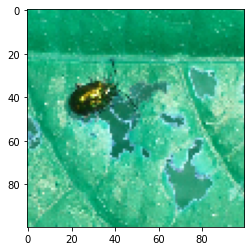

In [20]:
X = np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y = np.array([i[1] for i in train_data])
#Y = np_utils.to_categorical(Y, 102)

test_x = np.array([i[0] for i in test_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
test_y = np.array([i[1] for i in test_data])
#test_y = np_utils.to_categorical(test_y, 102)



#plt.imshow(train_data[1000][0])
#print(train_data[1000][0].shape)
plt.imshow(X[1000])
print(X[1000].shape)
print(Y[1000].shape)

In [21]:
def create_model():
    model_conv = MobileNet(weights='imagenet', include_top=False)
    keras_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3), name = 'image_input')
    output_conv = model_conv(keras_input)
    x = Flatten(name='flatten')(output_conv)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(102, activation='softmax', name='predictions')(x)
    pretrained_model = Model(inputs=keras_input, outputs=x)
    pretrained_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return pretrained_model

model = create_model()
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, None, None, 1024)  3228864  
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 fc1 (Dense)                 (None, 4096)              37752832  
                                                                 
 fc2 (Dense)                 (None, 4096)              16781312  
                                                                 
 predictions (Dense)         (None, 102)               417894    
                                                           

In [ ]:
model.fit(X, Y, batch_size=128, epochs=2, validation_data=(test_x, test_y))
#batch_size = 128
#convolution model = mobilenet, vgg19
#epochs = 2, 5, 10
#optimizer = adagrad, rmsprop, adam, adadelta, nesterov

Train on 45095 samples, validate on 22619 samples
Epoch 1/2
45095/45095 [==============================] - ETA: 0s - loss: 4.8745 - acc: 0.2408

C:\Users\moyee\anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


45095/45095 [==============================] - 1525s 34ms/sample - loss: 4.8745 - acc: 0.2408 - val_loss: 3.7290 - val_acc: 0.2020
Epoch 2/2
14592/45095 [========>.....................] - ETA: 14:51 - loss: 2.5833 - acc: 0.3628